<a href="https://colab.research.google.com/github/BalasuriyaK/Exploratory-Data-Analysis-With-Pandas-Volleyball-Dataset/blob/main/Exploratory_Data_Analysis_With_Pandas_Volleyball_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/VNL2023.csv")
df.head()
df.shape
df.describe()


,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [ ]:
df.isna().sum()

,0
Player,0
Country,0
Age,0
Attack,0
Block,0
Serve,0
Set,0
Dig,0
Receive,0
Position,0


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
126,False
127,False
128,False
129,False


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
numeric_cols = df.select_dtypes(include={"int","float"}).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)




              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


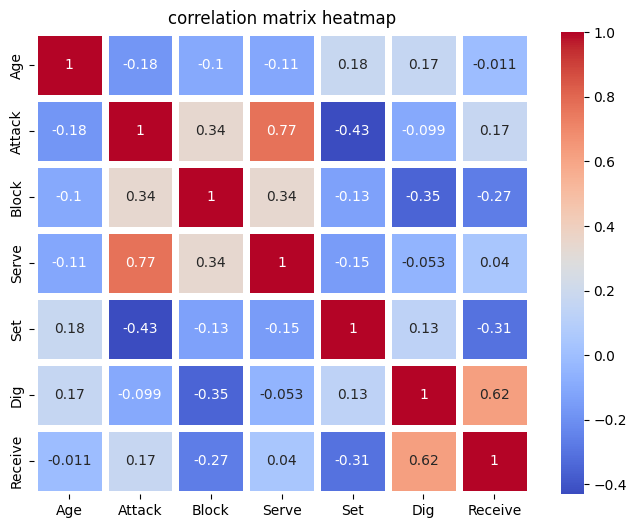

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot = True, cmap ="coolwarm",linewidths=5)
plt.title("correlation matrix heatmap")
plt.show()


In [ ]:
position_counts = df["Position"].value_counts()
position_counts.index

Index(['OH', 'MB', 'OP', 'S', 'L'], dtype='object', name='Position')

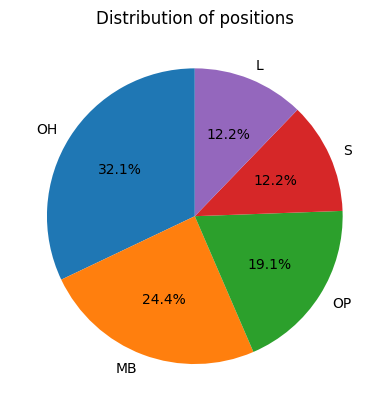

In [ ]:
plt.pie(position_counts, labels = position_counts.index, autopct = "%1.1f%%", startangle=90)
plt.title("Distribution of positions")
plt.show()

In [ ]:
avg_attack_by_country = df.groupby("Country")["Attack"].mean()
avg_attack_by_country.sort_values(ascending=False)


,Attack
Country,
France,6.670000
Japan,6.595000
Cuba,6.344286
Serbia,5.998750
Italy,5.965000
Slovenia,5.961250
Argentina,5.925000
Nederland,5.880000
Poland,5.807000


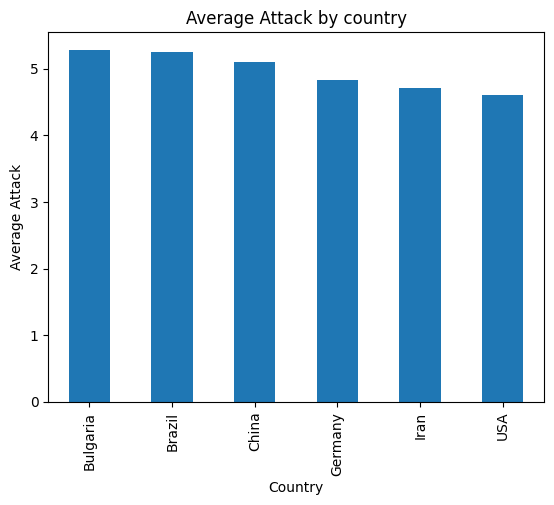

In [ ]:
avg_attack_by_country.sort_values(ascending= False).tail(6).plot(kind = "bar")
plt.title("Average Attack by country")
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.show()




In [ ]:
avg_Serve_by_age = df.groupby("Age")["Serve"].mean()
avg_Serve_by_age.sort_values(ascending = False)

,Serve
Age,
31,0.910000
20,0.880000
21,0.770000
26,0.681053
28,0.667273
35,0.666667
27,0.662500
36,0.660000
24,0.640667


In [ ]:
df.groupby(["Country","Position"])["Attack"].max().reset_index().sort_values(ascending=False, by ="Attack").head(20)


,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
27,Cuba,OH,12.33


In [ ]:
df.groupby("Country")["Dig"].sum()


,Dig
Country,
Argentina,33.88
Brazil,24.61
Bulgaria,22.45
Canada,26.50
China,22.08
Cuba,20.26
France,38.59
Germany,20.92
Iran,24.25


In [ ]:
df.columns

Index(['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig',
       'Receive', 'Position'],
      dtype='object')

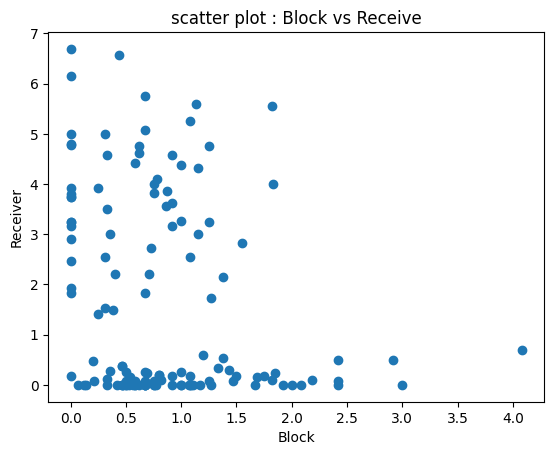

In [ ]:
plt.scatter(df["Block"],df['Receive'])
plt.title("scatter plot : Block vs Receive")
plt.xlabel("Block")
plt.ylabel("Receiver")
plt.show()



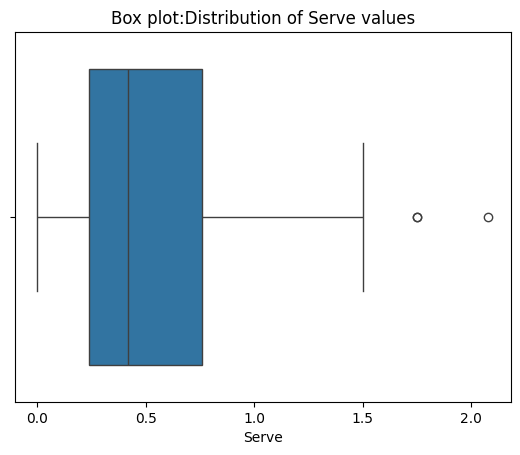

In [ ]:
sns.boxplot(x = df["Serve"])
plt.title("Box plot:Distribution of Serve values")
plt.xlabel("Serve")
plt.show()


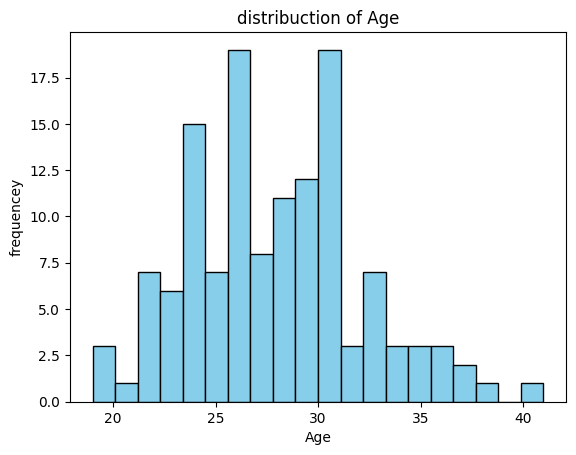

In [ ]:
plt.hist(df["Age"],bins = 20, color ="skyblue",edgecolor = "black")
plt.title("distribuction of Age")
plt.xlabel("Age")
plt.ylabel("frequencey")
plt.show()



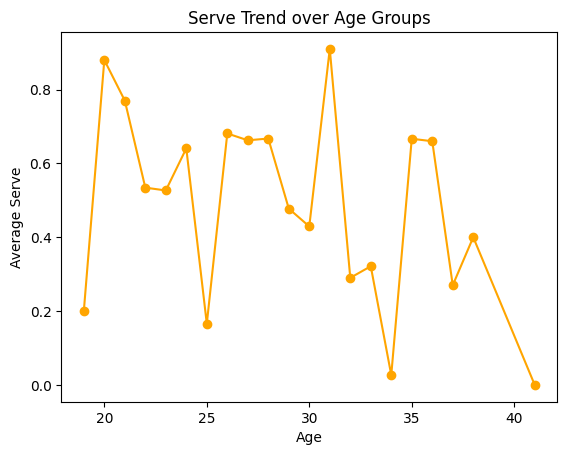

In [ ]:
serve_trend_by_age = df.groupby("Age")["Serve"].mean()

serve_trend_by_age.plot(kind = "line",marker= "o",linestyle ="-",color ="orange")
plt.title("Serve Trend over Age Groups")
plt.xlabel("Age")
plt.ylabel("Average Serve")
plt.show()

